## PCA on Pizza Dataset

The following data is the pizza-dataset from <a href="https://data.world/sdhilip/pizza-datasets">data world</a>. It consists of the following attributes:

- brand -- Pizza brand (class label)
- id -- Sample analysed
- mois -- Amount of water per 100 grams in the sample
- prot -- Amount of protein per 100 grams in the sample
- fat -- Amount of fat per 100 grams in the sample
- ash -- Amount of ash per 100 grams in the sample
- sodium -- Amount of sodium per 100 grams in the sample
- carb -- Amount of carbohydrates per 100 grams in the sample
- cal -- Amount of calories per 100 grams in the sample

Here is a preview of the data:

In [1]:
import pandas as pd

In [2]:
pizza = pd.read_csv('Pizza.csv')
pizza.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


## Data Exploration

Average attribute across different brands to see if there is a different trend. We see that brand B and I uses more water in their dough compared to the other brands, while brand G has the highest sodium levels per 100g.

In [3]:
pizza.groupby(['brand']).mean()

,id,mois,prot,fat,ash,sodium,carb,cal
brand,,,,,,,,
A,20632.000000,29.966207,20.107241,43.446897,5.014483,1.656207,1.486897,4.773793
B,19881.161290,51.307742,13.638710,27.620323,3.463548,0.984839,3.969677,3.190968
C,20001.703704,49.477407,26.025556,19.171111,3.283333,0.464815,2.046296,2.848889
D,19696.531250,47.671250,22.231250,21.645312,4.315938,0.715000,4.136250,3.003438
E,20158.321429,36.083214,7.732857,15.115714,1.476071,0.449286,39.592143,3.253929
F,21085.533333,29.404333,7.898000,16.424667,1.473667,0.462000,44.787333,3.596000
G,19934.551724,28.241034,8.236552,15.643793,1.446897,0.443793,46.431724,3.595172
H,20131.575758,35.825152,7.894545,14.291515,1.406061,0.416061,40.583939,3.224545
I,22001.689655,54.592759,10.383103,13.060690,2.098276,0.487241,19.865517,2.384138


## Dataset Description

The data consists of 300 different pizzas across 10 different brands with various different ingredient levels in their pizzas.

In [4]:
pizza.describe()

,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


## Pizza Count by Brand

The pizzas in the data seems pretty evenly distributed across the different brands

In [5]:
pizza.brand.value_counts()

H    33
J    32
D    32
B    31
F    30
G    29
I    29
A    29
E    28
C    27
Name: brand, dtype: int64

## Standardizing the Data for PCA

In PCA, it is important to standardize the attributes. Recall that PCA seeks to components according to maximal variance. If we did not standardize across the columns, an attribute with a high variance will get more weight compared to the rest, rendering the analysis meaningless. By normalizing the data such that all columns have equal variance, all attributes will start with the same weight and PCA will produce relevant axis.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_norm = scaler.fit_transform(pizza[['mois', 'prot', 'fat', 'ash', 'sodium','carb', 'cal']])
X_norm = pd.DataFrame(X_norm)
X_norm.columns = ['mois', 'prot', 'fat', 'ash', 'sodium','carb', 'cal']

After normalization, we have mean 0 and variance 1 for all columns.

In [7]:
X_norm.mean()

mois     -2.849572e-17
prot      3.482400e-16
fat      -4.296563e-16
ash      -9.505359e-16
sodium   -2.634929e-16
carb     -2.701543e-17
cal       2.505403e-16
dtype: float64

In [8]:
X_norm.var()

mois      1.003344
prot      1.003344
fat       1.003344
ash       1.003344
sodium    1.003344
carb      1.003344
cal       1.003344
dtype: float64

## PCA

We first fit a PCA with multiple components and see how much variability each component is able to capture.

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=5)
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Scree Plot of Components

The scree plots shows how much variability each component captures in the data. We can utilize the tool to select the number of components required depending on the application that we are interested. Since we would like to visualize the data points in the principal component axis, we choose two by default. Otherwise we can choose the number of components using the "elbow method" similar to how we choose the number of clusters in "K-Means".

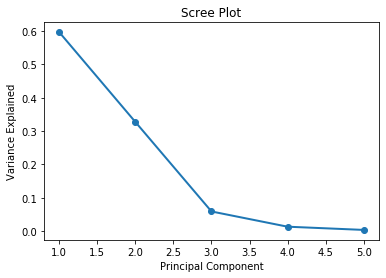

In [49]:
import matplotlib.pyplot as plt
import numpy as np

total_comp = np.arange(pca.n_components_) + 1
plt.plot(total_comp, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

In [12]:
pca = PCA(n_components=2)
pca.fit(X_norm)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## Component Loadings

We can extract the component loadings to get an understanding on how they load on the original variables of the data. The loadings represent the covariance between the components and each individual attributes in our original dataset. Since we standardized the data, these loadings have a correlation interpretation. Recall that the attributes were the following:

- mois -- Amount of water per 100 grams in the sample
- prot -- Amount of protein per 100 grams in the sample
- fat -- Amount of fat per 100 grams in the sample
- ash -- Amount of ash per 100 grams in the sample
- sodium -- Amount of sodium per 100 grams in the sample
- carb -- Amount of carbohydrates per 100 grams in the sample
- cal -- Amount of calories per 100 grams in the sample

In [13]:
pca.components_

array([[ 0.06470937,  0.3787609 ,  0.44666592,  0.47188953,  0.43570289,
        -0.42491371,  0.2444873 ],
       [-0.62827587, -0.26970665,  0.23437908, -0.11099042,  0.20166165,
         0.32031208,  0.56745756]])

Looking at the first component, we see that it has a positive correlation of 0.472 with the attribute ash (amount of ash/100g) and a negative correlation of -0.425 with carb (amount of carbohydrates/100g). Therefore, if a data point (pizza) scores high on the first component,  it indicates that the pizza has more ash and less carbs (the opposite holds, if a pizza has a low score on the first component).

## Transforming Data Points

With the components, we can perform vector multiplication to our data matrix X to get "Principal Component Scores". We thus reduce each datapoint from 7 dimensions down to 2. We can think of these scores as the projected data points onto the principal component space, based on the components that we defined above.

In [14]:
pca.fit_transform(X_norm)[:10]

array([[5.01034284, 2.67921532],
       [5.02375538, 2.52929455],
       [4.8054393 , 2.67370033],
       [4.4695434 , 2.28502923],
       [4.47189256, 2.1591524 ],
       [4.50479978, 2.16797296],
       [4.31535781, 2.05704328],
       [4.75785167, 2.35308587],
       [4.85461934, 2.68121904],
       [4.91640631, 2.65851314]])

In [15]:
PC_data_arr = pca.fit_transform(X_norm)
pc_df = pd.DataFrame(PC_data_arr)
pc_df.columns = ['PC1', 'PC2']
pc_df.head()

,PC1,PC2
0,5.010343,2.679215
1,5.023755,2.529295
2,4.805439,2.673700
3,4.469543,2.285029
4,4.471893,2.159152


We can also add back the brand feature to this dataset, to better understand graphically where each pizza ranks on the PC space

In [16]:
brand = pizza.brand
pc_df['brand'] = brand
pc_df.head()

,PC1,PC2,brand
0,5.010343,2.679215,A
1,5.023755,2.529295,A
2,4.805439,2.673700,A
3,4.469543,2.285029,A
4,4.471893,2.159152,A


## Visualizing our Data in the Principal Component Space

with the dataset above, we can visualize where each pizza ranks according to the principal components obtained.

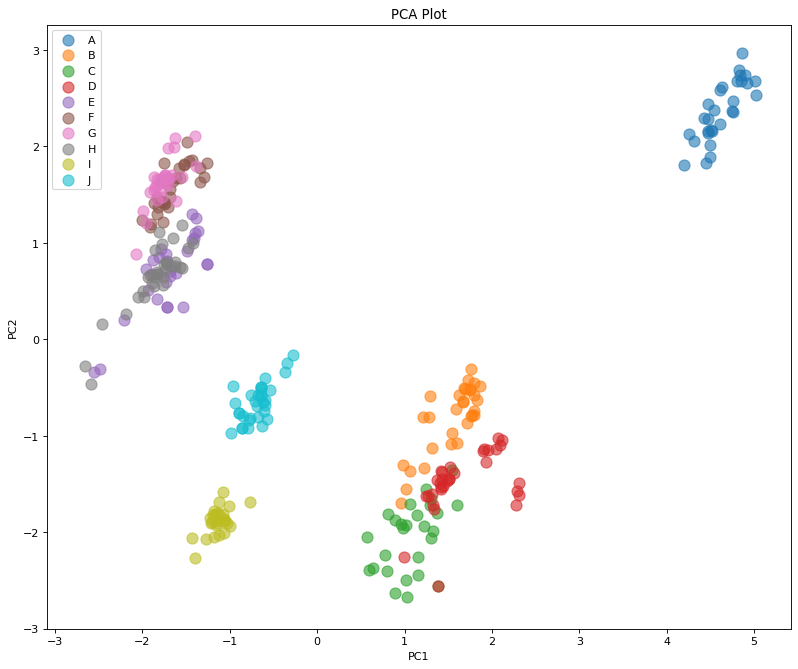

In [51]:
plt.figure(figsize=(12, 10), dpi=80)
groups = pc_df.groupby("brand")
for name, group in groups:
    plt.scatter(group["PC1"], group["PC2"], marker="o", label=name, alpha=0.6, s=100)
plt.title('PCA Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()